In [80]:
# No es el CMYK verdadero, es un CMYK de W3School, el verdadero se obtiene al transformar esta escala en RGB y de ahi a CMYK
def cmyk(cpt):
    cmyk_matrix = np.ndarray((len(cpt), 4), int)
    # Iteramos por las filas de tabla
    for i in range(len(cpt)):
        cmyk_array = [0, 0, 0, 0]
        absent_value = cpt[i][0]
        max_index = 1

        # Iterate through non-absent states to determine the index of max color
        for j in range(1, 4, 1):
            if cpt[i][j] > cpt[i][max_index]:
                max_index = j

        # Determine the max_color value
        max_color = 100 - (absent_value * 100)

        # Iterate through non-absent states to determine their color
        for j in range(1, 4, 1):
            if j == max_index:
                cmyk_array[j-1] = max_color
            else:
                color = (cpt[i][j] * max_color) / cpt[i][max_index]  # Regla de 3 para obtener la proporcion
                cmyk_array[j-1] = color

        # Add the color array to the matrix
        cmyk_matrix[i] = cmyk_array

    return cmyk_matrix

def cmyk_to_hex_matrix(cmyk_matrix):
    hex_array = []
    for i in range(0, len(cmyk_matrix)):
        cmyk_array = cmyk_matrix[i]
        c = cmyk_array[0]
        m = cmyk_array[1]
        y = cmyk_array[2]
        k = cmyk_array[3]
        r = 255*(1.0-(c+k)/float(100))
        g = 255*(1.0-(m+k)/float(100))
        b = 255*(1.0-(y+k)/float(100))
        rgb = (int(r),int(g),int(b))
        hex = '#%02x%02x%02x' % rgb
        hex_array.append(hex)
    return np.asarray(hex_array)


In [66]:
import pandas
import numpy as np

# Cargamos las CPTs de cada uno de los genes para el cluster correspondiente en forma de pandas DF (uno por cada cluster)
marginals = pandas.read_csv("heatmap_cpts/marginals.csv")
marginals = marginals.values

# Generamos los vectores de colores para mostrarlos en forma de tabla
marginal_colors = cmyk(marginals)
marginal_colors = cmyk_to_hex_matrix(marginal_colors)

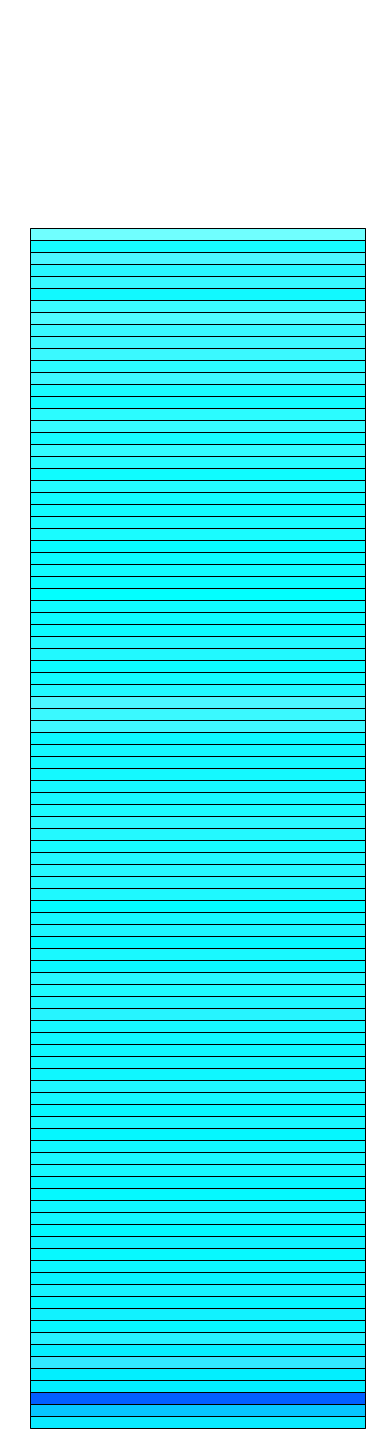

In [79]:
import matplotlib.pyplot as plt

cols = list(range(1,101))
base_colors = []
for i in range(1,101):
    base_colors.append("w")

rows = ["marginal"]

# Creamos la tabla
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellColours=base_colors)

# Pintamos la tabla con los colores de la marginal
for i in range(0, 100):
    the_table._cells[(i, 0)].set_facecolor(marginal_colors[i])
    j = 0
plt.show()

In [67]:
for i in range(0, 100):
    the_table._cells[(i, 0)].set_facecolor(marginal_colors[i])

'#70ffff'

In [73]:
the_table._cells[(0, 0)].set_facecolor("#70ffff")
plt.show()